In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.simplefilter(action="ignore")

%matplotlib inline

**Using KNN algoritm based on strict assumption that most neighbor cities relatively have similiar inflation.**

In [2]:
loc = pd.read_stata("C:/Users/Redata/Downloads/kodeifls.dta")
loc.sample(2)

,index,provid00,provid07,provid14,nmprov2000,nmprov2007,nmprov2014,kabid00,kabid07,kabid14,nmkab2000,nmkab2007,nmkab2014,Nmkab2014,Latitude__generated_,Longitude__generated_
1172,1172,14.0,14.0,14.0,RIAU,RIAU,RIAU,1408,1408.0,1410.0,BENGKALIS,BENGKALIS,KEPULAUAN MERANTI,KEPULAUAN MERANTI,0.9078,102.6737
1066,1066,14.0,14.0,14.0,RIAU,RIAU,RIAU,1402,1402.0,1402.0,INDRAGIRI HULU,INDRAGIRI HULU,INDRAGIRI HULU,INDRAGIRI HULU,-0.4973,102.3054


In [3]:
a = pd.read_csv("C:/Users/Redata/Downloads/read/SKRIPSI/Bab1/inflasibase.txt", sep="\t")
del a["Unnamed: 0"], 
#little bit cleaned
a = a.melt(id_vars=['nmkab2014', 'latitude', 'longitude'], value_vars=['2000', '2007', '2014'], value_name="IHK", var_name="tahun")
a["IHK"] = round(a["IHK"], 2)

In [4]:
ma = a[a["tahun"] == "2014"]
ma["have CPI Data?"] = ma["IHK"].notnull()

## The Cities sample want to predict

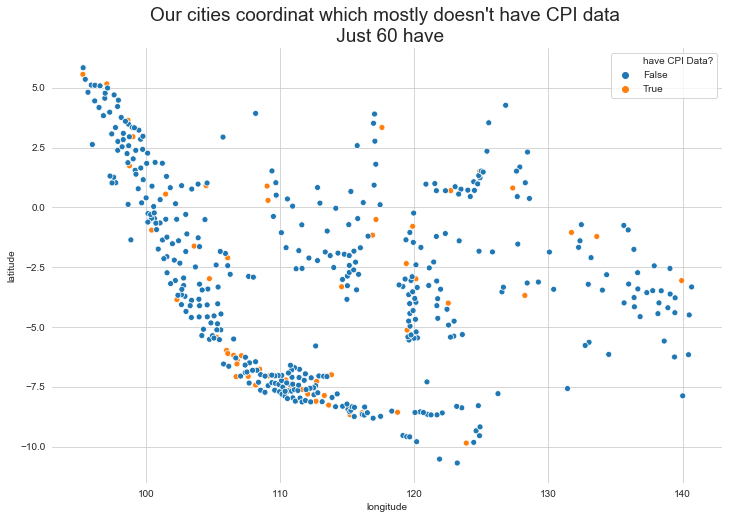

In [5]:
plt.figure(figsize=(12, 8))
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="longitude", y="latitude", hue="have CPI Data?", data=ma)
plt.title("Our cities coordinat which mostly doesn't have CPI data \n Just 60 have", size=19)
sns.despine(left = True, bottom = True)
plt.show()

## Our training sample to build model

In [6]:
a

,nmkab2014,latitude,longitude,tahun,IHK
0,AMBON,-3.6825,128.2441,2000,43.43
1,TERNATE,0.8110,127.3413,2000,39.70
2,BANDA ACEH,5.5620,95.3200,2000,31.99
3,LHOKSEUMAWE,5.1624,97.1024,2000,38.24
4,MEDAN,3.6429,98.6761,2000,38.12
...,...,...,...,...,...
1408,PUNCAK,-3.5636,137.3294,2014,NaN
1409,PUNCAK JAYA,-3.4820,137.7710,2014,NaN
1410,SARMI,-2.5531,139.0535,2014,NaN
1411,KEEROM,-3.3273,140.6660,2014,NaN


## We training the model based on non-null values in sample base
**Because not all our base cities have zero missing values.**

In [7]:
test1 = a[a["IHK"].isnull()]
train = a[a["IHK"].notnull()]
train

,nmkab2014,latitude,longitude,tahun,IHK
0,AMBON,-3.6825,128.2441,2000,43.43
1,TERNATE,0.8110,127.3413,2000,39.70
2,BANDA ACEH,5.5620,95.3200,2000,31.99
3,LHOKSEUMAWE,5.1624,97.1024,2000,38.24
4,MEDAN,3.6429,98.6761,2000,38.12
...,...,...,...,...,...
993,JEMBER,-8.2654,113.6287,2014,112.13
994,BIMA,-8.5644,118.7599,2014,116.05
995,MATARAM,-8.5875,116.1181,2014,112.52
996,DENPASAR,-8.6681,115.2207,2014,111.32


In [8]:
# we only use lat, long, and year variable as feature
X_train = train[["latitude", "longitude", "tahun"]]
# to predict IHK (inflation)
y_train = train["IHK"].astype("str")

In [9]:
# using KNN algoritm based on strict assumption that most neighbor cities relatively have similiar inflation
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
X_test = test1[["latitude", "longitude", "tahun"]]
y_pred = knn.predict(X_test)
test1["IHK"] = y_pred
test1.sample(10)

,nmkab2014,latitude,longitude,tahun,IHK
1089,TANJUNG JABUNG TIMUR,-1.2710,103.9072,2014,113.61
889,MALUKU TENGGARA,-5.6401,133.0276,2007,71.57
570,DAIRI,2.8329,98.3258,2007,72.9
1068,INDRAGIRI HILIR,-0.2940,102.9822,2014,113.61
101,DELI SERDANG,3.4802,98.7195,2000,38.12
23,MAMUJU,-2.3491,119.4109,2000,34.89
794,GUNUNG MAS,-0.9888,113.5175,2007,71.33
890,TUAL,-5.7717,132.7378,2007,71.57
151,OGAN KOMERING ULU SELATAN,-4.5787,103.9780,2000,36.46
645,BENGKULU TENGAH,-3.6742,102.3995,2007,71.87


In [11]:
train_data = pd.concat([train, test1], axis=0)
train_data.sample(5)

,nmkab2014,latitude,longitude,tahun,IHK
1105,MUSI RAWAS,-2.9513,102.8231,2014,116.17
232,TEMANGGUNG,-7.2384,110.1215,2000,38.88
438,TELUK WONDAMA,-2.8147,134.3364,2000,35.91
44,TASIKMALAYA,-7.4280,108.1869,2000,36.69
1249,KUBU RAYA,-0.3783,109.5111,2014,116.38


In [12]:
train_data.IHK = train_data.IHK.astype("float")
z = train_data[train_data["tahun"] == "2014"]

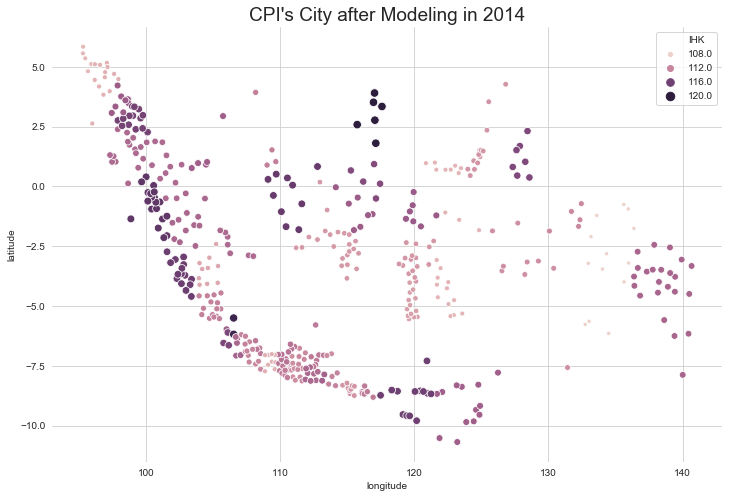

In [13]:
plt.figure(figsize=(12, 8))
sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="longitude", y="latitude",data= z, size="IHK", hue="IHK")
plt.title("CPI's City after Modeling in 2014", size=19)
sns.despine(left = True, bottom = True)
plt.legend()
plt.show()

In [14]:
kabid = loc[["kabid00", "kabid07", "kabid14", "nmkab2014"]]
kabid.rename(columns={"kabid00":"2000", "kabid07":"2007", "kabid14":"2014"}, inplace=True)
kabid = kabid.melt(id_vars=['nmkab2014'], value_vars=['2000', '2007', '2014'], 
                   value_name="kabid", var_name="tahun").drop_duplicates()
data = pd.merge(train_data, kabid, left_on=["nmkab2014", "tahun"], right_on=["nmkab2014", "tahun"])
data.drop_duplicates(inplace=True)
data.to_csv("IHKifls.csv")
data.sample(10)

,nmkab2014,latitude,longitude,tahun,IHK,kabid
1479,YAHUKIMO,-4.4032,139.4204,2014,113.68,9416.0
1458,TELUK WONDAMA,-2.8147,134.3364,2014,108.57,9103.0
471,KATINGAN,-1.8651,113.3736,2000,38.51,6202.0
696,TEBING TINGGI,3.3276,99.1559,2007,72.90,1274.0
1470,MAMBERAMO RAYA,-2.4434,137.8819,2014,113.68,9428.0
1363,KUTAI KARTANEGARA,0.2008,116.2038,2014,115.28,6403.0
327,LAMPUNG TIMUR,-5.1197,105.5927,2000,36.46,1804.0
1437,MALUKU TENGGARA BARAT,-7.5742,131.4221,2014,111.59,8101.0
444,MALAKA,-9.5466,124.8640,2000,35.25,5306.0
216,PIDIE,5.1144,95.9415,2000,31.99,1109.0
